In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qbm import QBM
from tqdm import tqdm

# matplotlib styling
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = '12'

# Coherent States

## Functions

In [2]:
def harper_states_pq(s: QBM):
    N = s.N
    s.gen_harper_states()
    h_st = s.harper_states["evecs"]
    h_pqs = []
    for _ in tqdm(range(N)):
        atemp = np.zeros((N, N))
        for p in range(N):
            for q in range(N):
                atemp[q, p] = s.W_pq(q+1, p+1, h_st[_])
        h_pqs.append(atemp)
    return h_pqs, s.harper_states['evals']

In [3]:
def baker_states_pq(s: QBM):
    N = s.N
    s.gen_baker_states()
    b_st = s.baker_states["evecs"]
    b_pqs = []
    for _ in tqdm(range(N)):
        atemp = np.zeros((N, N))
        for p in range(N):
            for q in range(N):
                atemp[q, p] = s.W_pq(q+1, p+1, b_st[_])
        b_pqs.append(atemp)
    return b_pqs, s.baker_states['evals']

In [4]:
def plot_harper_states(
    hpqs, hvals, nc :int = 4,
    interp='spline16', cmap='hot'
    ):
    N = len(hvals)
    if N % nc:
        nr = (N // nc) + 1
    else:
        nr = N // nc
    fig, axes = plt.subplots(nr, nc, figsize=(nc*2, nr*2))
    ind = 1
    for i in range(nr):
        for j in range(nc):
            if ind > N:
                axes[i, j].axis('off')
                continue
            axes[i, j].set_title(f"n = {ind} ({np.round(np.abs(hvals[ind-1]), 4)})", pad = 0.5, y = 2)
            axes[i, j].matshow(hpqs[ind-1], interpolation=interp, cmap=cmap)
            ind += 1
    for ax in axes.ravel():
        # ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
    plt.suptitle(f'Harper eigenstates in coherent-state representation (N = {N})')
    plt.tight_layout()
    plt.show()

In [5]:
def plot_baker_states(
    bpqs, bquasi, bpars, par = 1, nc :int = 4,
    interp='spline16', cmap='hot'
    ):
    Norig = len(bpqs)
    N = np.count_nonzero(bpars == par)
    if N % nc:
        nr = (N // nc) + 1
    else:
        nr = N // nc
    fig, axes = plt.subplots(nr, nc, figsize=(nc*2, nr*2))

    parray = np.array([par]*len(bpars))
    parfilter = (bpars == parray)
    bpqspar_ = np.array(bpqs)[parfilter]
    bquasipar = bquasi[parfilter]
    idx = bquasipar.argsort()
    bquasipar = bquasipar[idx]
    bpqspar = bpqspar_[idx]
    ind = 1
    for i in range(nr):
        for j in range(nc):
            if ind > N:
                axes[i, j].axis('off')
                continue
            axes[i, j].set_title(f"{ind} ({np.round(bquasipar[ind-1], 7)})", pad = 0.5, y = 2)
            axes[i, j].matshow(bpqspar[ind-1], interpolation=interp, cmap=cmap)
            ind += 1
    for ax in axes.ravel():
        # ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
    plt.suptitle(f'Baker eigenstates (R = {par}) in coherent-state representation (N = {Norig})')
    plt.tight_layout()
    plt.show()

## Harper states

In [6]:
s = QBM(16)

In [7]:
s2 = QBM(23)
hs2 = harper_states_pq(s2)

100%|██████████| 23/23 [00:02<00:00,  7.93it/s]


In [8]:
hs = harper_states_pq(s)

100%|██████████| 16/16 [00:00<00:00, 37.48it/s]


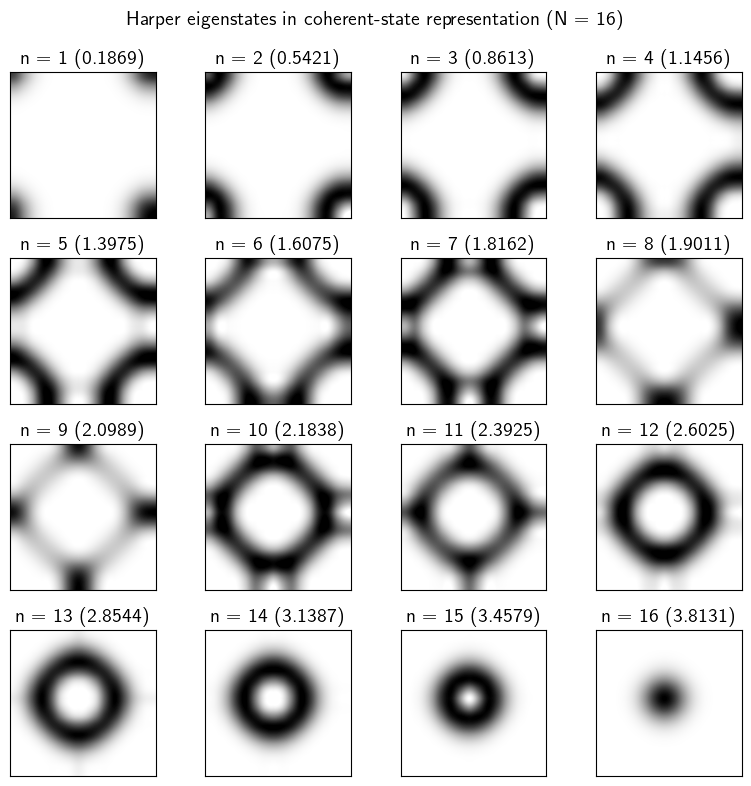

In [9]:
plot_harper_states(*hs, cmap='binary')

## Duality?

In [10]:
def plot_compare_states(state1, state2, k, cmap = "binary", interp = "spline16"):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    axes[0].matshow(state1, cmap=cmap, interpolation=interp)
    axes[1].matshow(state2, cmap=cmap, interpolation=interp)
    for ax in axes.ravel():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set(aspect=1)
    plt.suptitle(f"Eigenstate (left) and shifted dual state (right) (k = {k})")
    plt.tight_layout()
    plt.show()

In [11]:
def get_shifted_phase(og_st, du_st, op, npc = False):
    npval = og_st.H @ op @ du_st
    if npc:
        return npval
    return np.angle(npval)

In [12]:
s = s2
h_states = s.harper_states['evecs']
sh_op = s.T_pq(s.N//2, s.N//2)

In [13]:
s2 = QBM(16)

In [14]:
h_states = s.harper_states['evecs']

In [15]:
for _ in range(s2.N):
    plot_compare_states(s2.move_hs(_, (s2.N//2, s2.N//2)), s2.gen_W(h_states[-1-_]), _)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 23 is different from 16)

In [ ]:
def k_phase(k: int, h_states: list, sh_op, npc = False):
    og_st = h_states[-1-k]
    du_st = h_states[k]
    return get_shifted_phase(og_st, du_st, sh_op, npc)[0, 0]

In [ ]:
phases = []
for _ in range(s.N):
    phases.append(np.round(k_phase(_, h_states, sh_op, False)/np.pi, 10))

In [ ]:
phases

[-0.2282608696,
 0.7717391304,
 -0.2282608696,
 0.7717391304,
 0.7717391304,
 -0.2282608696,
 0.7717391304,
 -0.2282608696,
 0.7717391304,
 -0.2282608696,
 0.7717391304,
 -0.4782608696,
 -0.7282608696,
 0.2717391304,
 -0.7282608696,
 0.2717391304,
 -0.7282608696,
 0.2717391304,
 -0.7282608696,
 -0.7282608696,
 0.2717391304,
 -0.7282608696,
 0.2717391304]

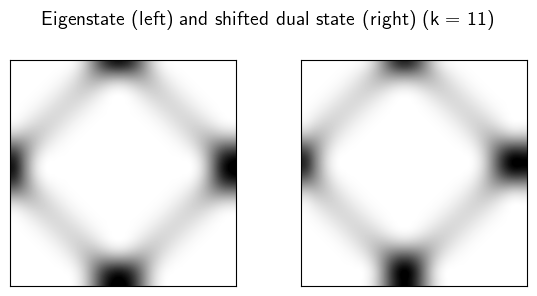

In [ ]:
plot_compare_states(
    s.gen_W(s.harper_states['evecs'][11]),
    s.gen_W(s.T_pq(11, 11) @ s.harper_states['evecs'][11]),
    11
)


In [ ]:
n = 3
val = []
for n in range(24):
    val.append(
        (s.harper_states['evecs'][11].T @ s.T_pq(n, n) @ s.harper_states['evecs'][11])[0, 0]
    )

In [ ]:
kphases = []
for _ in range(s.N):
    kphases.append(k_phase(_, h_states, sh_op, np=True))

In [ ]:
kphases

NameError: name 'kphases' is not defined

In [ ]:
s3 = QBM(16)
s3.gen_harper_states()
hs3 = s3.harper_states['evecs']
sh3 = s3.T_pq(s3.N//2, s3.N//2)

In [ ]:
kph3 = []
for _ in range(s3.N):
    kph3.append(k_phase(_, hs3, sh3, np=True))

In [ ]:
np.abs(kph3)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
s4 = QBM(17)
s4.gen_harper_states()
hs4 = s4.harper_states['evecs']
sh4 = s4.T_pq(s4.N//2, s4.N//2)

In [ ]:
kph4 = []
for _ in range(s4.N):
    kph4.append(k_phase(_, hs4, sh4, np=True))

In [ ]:
np.abs(kph4)

array([0.95477523, 0.86621496, 0.78113762, 0.69882206, 0.61812689,
       0.53691408, 0.45179742, 0.36488567, 0.63719292, 0.36488567,
       0.45179742, 0.53691408, 0.61812689, 0.69882206, 0.78113762,
       0.86621496, 0.95477523])

In [ ]:
s4.H['H']

matrix([[ 1.01702690e+00+0.00000000e+00j,
         -5.00000000e-01+1.73472348e-18j,
          4.16333634e-17+4.07660017e-17j,
          2.08166817e-17-9.19403442e-17j,
          2.08166817e-17+5.03069808e-17j,
         -2.60208521e-17-6.59194921e-17j,
         -8.67361738e-18+2.87964097e-16j,
         -1.04083409e-16+1.90819582e-16j,
          9.10729825e-18+4.44089210e-16j,
         -7.45931095e-17+1.21430643e-16j,
         -4.77048956e-18+2.63677968e-16j,
         -1.42247325e-16+2.42861287e-17j,
          4.18068358e-16+1.73472348e-17j,
         -4.57966998e-16-2.39391840e-16j,
          1.28369537e-16-1.99493200e-16j,
         -2.84494650e-16-4.00721123e-16j,
          5.00000000e-01-1.18493183e-15j],
        [-5.00000000e-01-1.73472348e-18j,
          1.14978286e+00+0.00000000e+00j,
         -5.00000000e-01+1.73472348e-18j,
          4.16333634e-17+4.07660017e-17j,
          2.08166817e-17-9.19403442e-17j,
          2.08166817e-17+5.03069808e-17j,
         -2.60208521e-17-6.591949

In [ ]:
mid = s4.harper_states['evecs'][s4.N // 2]

In [ ]:
mid.T @ s4.T_pq(s4.N//2, s4.N//2) @ s4.H['H'] @ mid

matrix([[0.12020233-1.29718968j]])

In [ ]:
s3.harper_states['evecs'][s3.N // 2] @ s4.T_pq(s4.N//2, s4.N//2) @ s4.H['H'] @ s3.harper_states['evecs'][s3.N // 2]

In [ ]:
np.abs(kphases)

array([0.96639931, 0.90027163, 0.83618839, 0.77391974, 0.71317348,
       0.65355293, 0.59446898, 0.53492697, 0.47303727, 0.4061126 ,
       0.33650562, 0.63613702, 0.33650562, 0.4061126 , 0.47303727,
       0.53492697, 0.59446898, 0.65355293, 0.71317348, 0.77391974,
       0.83618839, 0.90027163, 0.96639931])

In [ ]:
np.abs(val)

array([1.        , 0.7047708 , 0.61227807, 0.56274285, 0.53326627,
       0.51639148, 0.50906434, 0.51016405, 0.51985819, 0.53975581,
       0.57419626, 0.63613702, 0.63613702, 0.57419626, 0.53975581,
       0.51985819, 0.51016405, 0.50906434, 0.51639148, 0.53326627,
       0.56274285, 0.61227807, 0.7047708 , 1.        ])

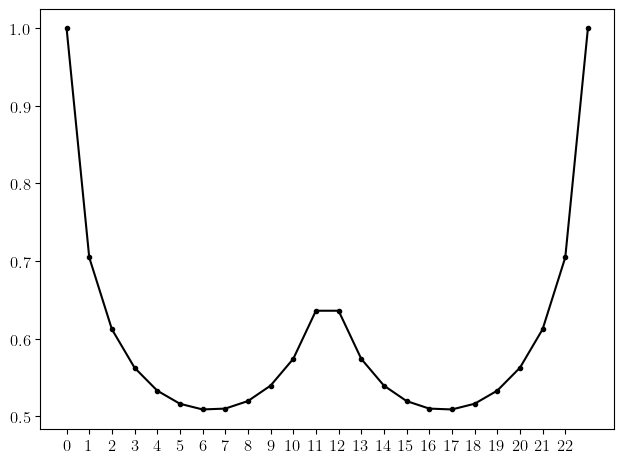

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.abs(val), 'k.-')
ax.set_xticks(list(range(23)))
plt.tight_layout()
plt.show()

In [ ]:
hsmid = s.harper_states['evecs'][s.N // 2]
hsmid_s = s.T_pq(s.N // 2, s.N // 2) @ hsmid

In [ ]:
for _ in phases:
    print(_)

-0.2282608696
0.7717391304
-0.2282608696
0.7717391304
0.7717391304
-0.2282608696
0.7717391304
-0.2282608696
0.7717391304
-0.2282608696
0.7717391304
-0.4782608696
-0.7282608696
0.2717391304
-0.7282608696
0.2717391304
-0.7282608696
0.2717391304
-0.7282608696
-0.7282608696
0.2717391304
-0.7282608696
0.2717391304


In [ ]:
N = s2.N
for _ in range(N//2):
    print(phases[_], phases[-1-_])

-0.2282608696 0.2717391304
0.7717391304 -0.7282608696
-0.2282608696 0.2717391304
0.7717391304 -0.7282608696
0.7717391304 -0.7282608696
-0.2282608696 0.2717391304
0.7717391304 -0.7282608696
-0.2282608696 0.2717391304
0.7717391304 -0.7282608696
-0.2282608696 0.2717391304
0.7717391304 -0.7282608696


## Scratchpad

/tmp/ipykernel_1862940/2526626666.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.matshow(s.gen_W(s.harper_states['evecs'][_]), cmap = "inferno", interpolation = 'spline16')


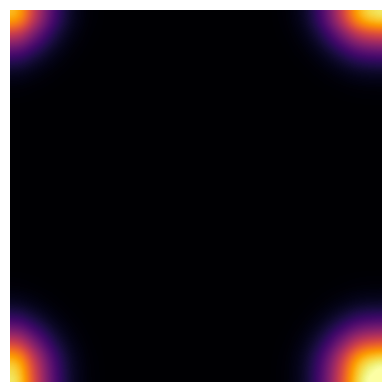

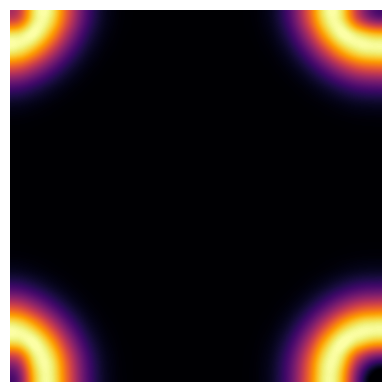

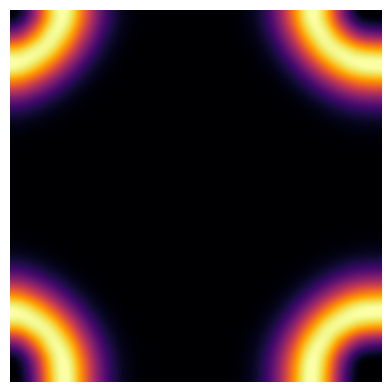

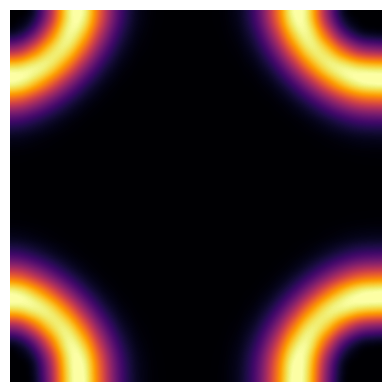

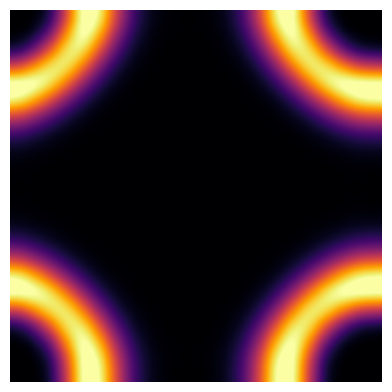

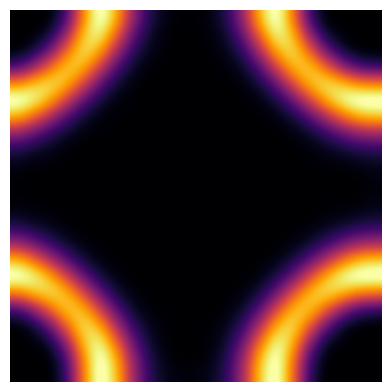

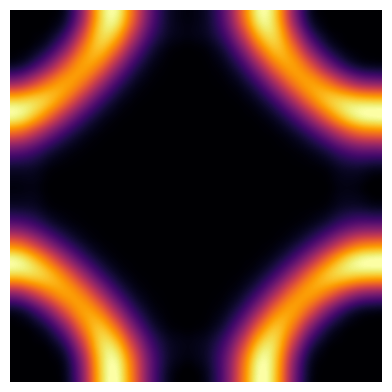

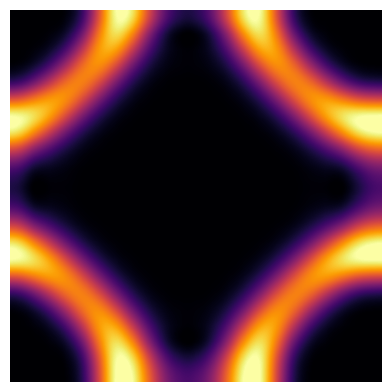

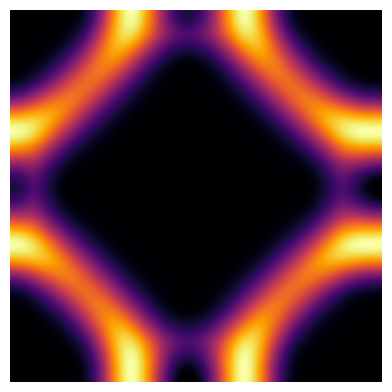

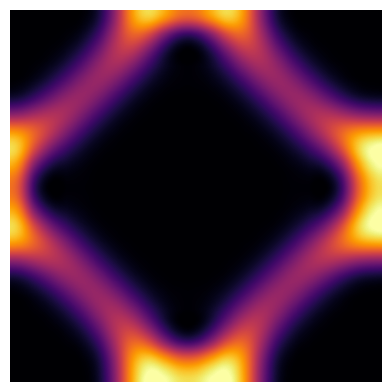

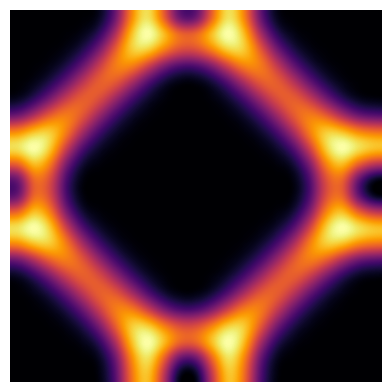

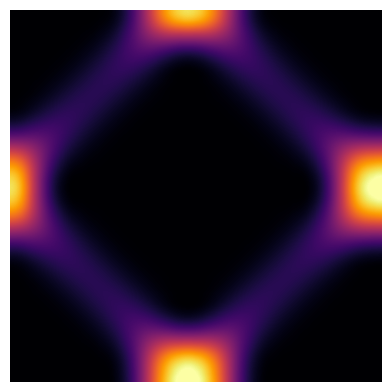

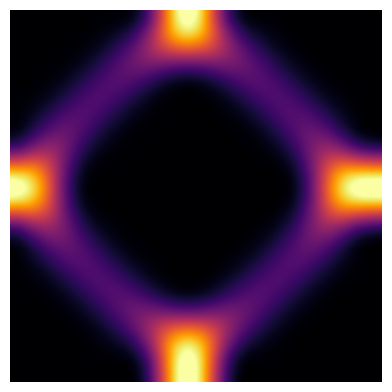

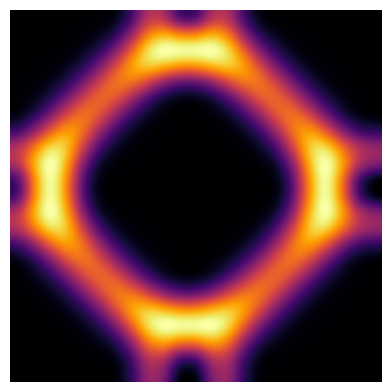

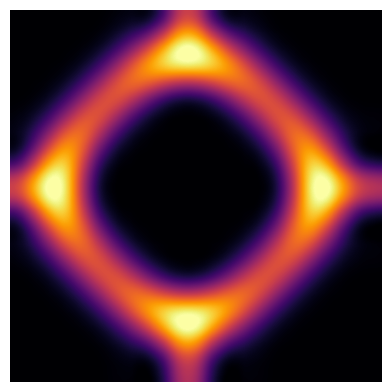

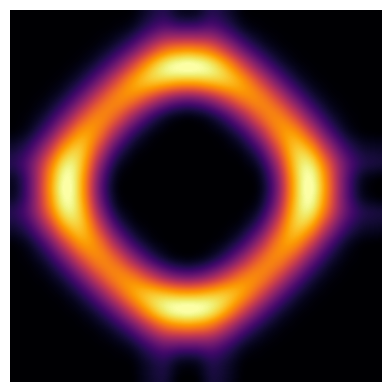

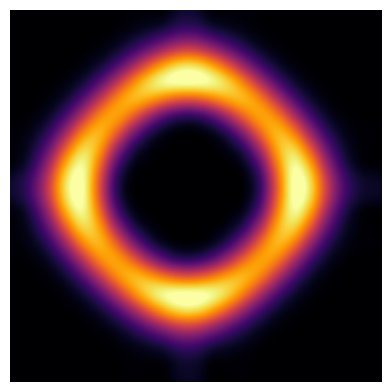

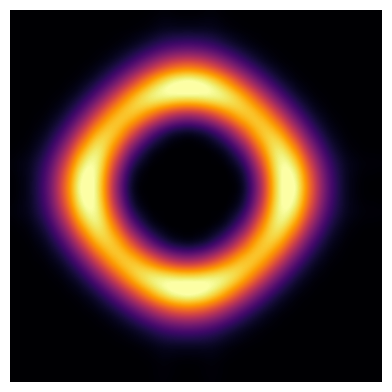

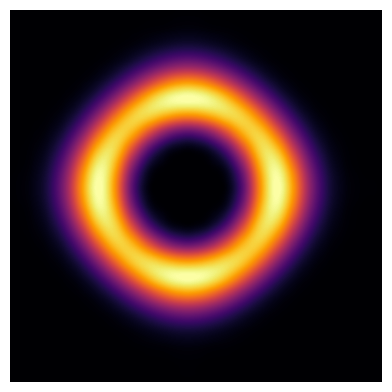

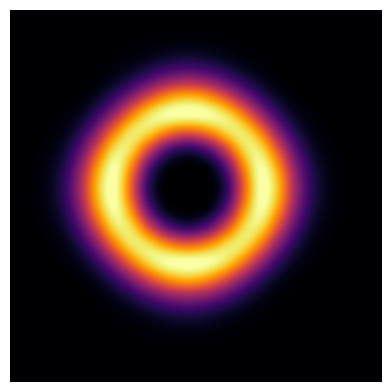

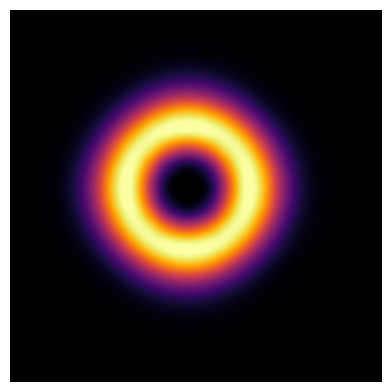

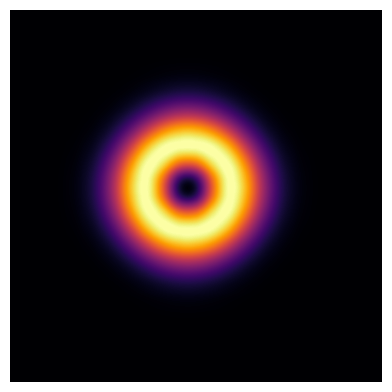

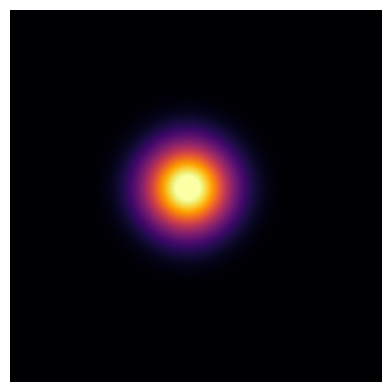

In [ ]:
s = s
N = s.N
for _ in range(N):
    fig = plt.matshow(s.gen_W(s.harper_states['evecs'][_]), cmap = "inferno", interpolation = 'spline16')
    plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.savefig(f'../plots/anim/t-{str(_).zfill(2)}.png', bbox_inches='tight', pad_inches = 0)

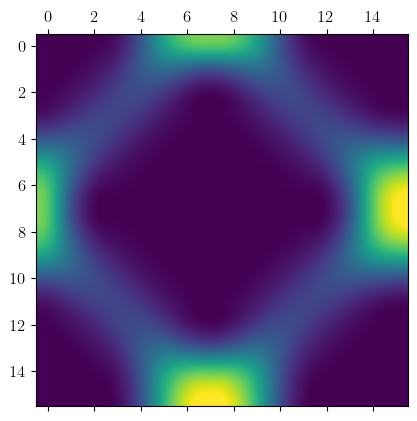

In [ ]:
plt.matshow(s.move_hs(8, (8, 8), autocorr=True), interpolation='spline16')
plt.show()

In [ ]:
plt.matshow(s.baker_states['evecs'])
plt.show()

In [ ]:
h0 = s.harper_states['evecs'][0]
h0s = s.T_pq(8, 8) @ h0

In [ ]:
N = s.N
h0s_pq = np.zeros((N, N))
for p in range(N):
    for q in range(N):
        h0s_pq[q, p] = s.W_pq(q+1, p+1, h0s)

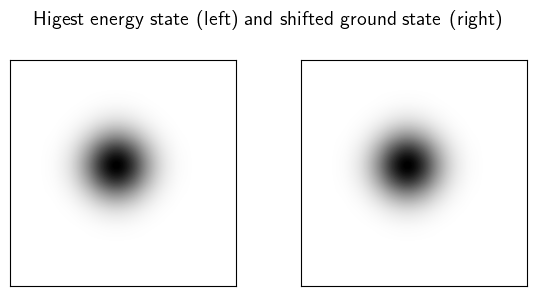

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
cmap = "binary"
interp = "spline16"
X = np.linspace(0, s.N-1, s.N)
Y = np.linspace(0, s.N-1, s.N)

axes[0].matshow(hs[0][-1].T, cmap=cmap, interpolation=interp)
# axes[0].contour(X, Y, hs[0][-1], cmap='binary')
axes[1].matshow(h0s_pq.T, cmap=cmap, interpolation=interp)
# axes[1].contour(X, Y, h0s_pq, cmap='binary')
for ax in axes.ravel():
    # ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set(aspect=1)
plt.suptitle(f'Higest energy state (left) and shifted ground state (right)')
plt.tight_layout()
plt.show()

In [ ]:
testeq = lambda  _ : np.isclose(
    (s.H["H"] @ s.harper_states['evecs'][_]) / s.harper_states['evals'][_],
    s.harper_states['evecs'][_], atol = 0.0
).T.all()

In [ ]:
outeq = [testeq(_) for _ in range(s.N)]
np.all(outeq)

True

In [ ]:
((s.H['H'] @ h0s)/s.harper_states['evals'][-1]).T

matrix([[-6.15994497e-16-9.99878184e-05j,
          6.23510811e-16+6.58706408e-04j,
         -4.19055355e-16-3.38406534e-03j,
          1.02250709e-16+1.53730882e-02j,
          1.62798121e-16-5.83615848e-02j,
         -4.13377180e-16+1.73491734e-01j,
         -1.29631700e-16-3.77997115e-01j,
         -1.13187794e-15+5.68651472e-01j,
         -1.39883284e-16-5.68651472e-01j,
          1.17254715e-16+3.77997115e-01j,
          3.74908589e-18-1.73491734e-01j,
         -2.80118444e-17+5.83615848e-02j,
         -1.65122879e-16-1.53730882e-02j,
          2.13283638e-16+3.38406534e-03j,
          3.17205876e-17-6.58706408e-04j,
         -3.84911163e-16+9.99878184e-05j]])

In [ ]:
(s.harper_states['evecs'][-1]).T

matrix([[-9.99878184e-05+5.42210776e-17j,
          6.58706408e-04-1.60411516e-17j,
         -3.38406534e-03-2.41407249e-17j,
          1.53730882e-02+5.57826205e-17j,
         -5.83615848e-02-7.40411190e-17j,
          1.73491734e-01+7.53086210e-17j,
         -3.77997115e-01-5.26516326e-17j,
          5.68651472e-01+0.00000000e+00j,
         -5.68651472e-01+6.08294560e-17j,
          3.77997115e-01-9.30865210e-17j,
         -1.73491734e-01+9.38672783e-17j,
          5.83615848e-02-8.02841406e-17j,
         -1.53730882e-02+5.74271016e-17j,
          3.38406534e-03-2.45027232e-17j,
         -6.58706408e-04-1.59706888e-17j,
          9.99878184e-05+5.42103818e-17j]])

In [ ]:
np.isclose(((s.H['H'] @ h0s)/s.harper_states['evals'][-1]), s.harper_states['evecs'][-1], atol=0.0).T

matrix([[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False]])

In [ ]:
np.angle(s.harper_states['evecs'][-1].T @ h0s)[0, 0]

1.5707963267948972

In [ ]:
((s.H['H'] @ h0s)/s.harper_states['evals'][-1])

matrix([[-6.15994497e-16-9.99878184e-05j],
        [ 6.23510811e-16+6.58706408e-04j],
        [-4.19055355e-16-3.38406534e-03j],
        [ 1.02250709e-16+1.53730882e-02j],
        [ 1.62798121e-16-5.83615848e-02j],
        [-4.13377180e-16+1.73491734e-01j],
        [-1.29631700e-16-3.77997115e-01j],
        [-1.13187794e-15+5.68651472e-01j],
        [-1.39883284e-16-5.68651472e-01j],
        [ 1.17254715e-16+3.77997115e-01j],
        [ 3.74908589e-18-1.73491734e-01j],
        [-2.80118444e-17+5.83615848e-02j],
        [-1.65122879e-16-1.53730882e-02j],
        [ 2.13283638e-16+3.38406534e-03j],
        [ 3.17205876e-17-6.58706408e-04j],
        [-3.84911163e-16+9.99878184e-05j]])

In [ ]:
np.isclose((((s.H['H'] @ h0s)/s.harper_states['evals'][-1])*np.exp(-1j*np.pi/2)).real, (s.harper_states['evecs'][-1]).real)

matrix([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]])

In [ ]:
(s.harper_states['evecs'][-1]).real

matrix([[-9.99878184e-05],
        [ 6.58706408e-04],
        [-3.38406534e-03],
        [ 1.53730882e-02],
        [-5.83615848e-02],
        [ 1.73491734e-01],
        [-3.77997115e-01],
        [ 5.68651472e-01],
        [-5.68651472e-01],
        [ 3.77997115e-01],
        [-1.73491734e-01],
        [ 5.83615848e-02],
        [-1.53730882e-02],
        [ 3.38406534e-03],
        [-6.58706408e-04],
        [ 9.99878184e-05]])

In [ ]:
s.harper_states['evecs'][-1]

matrix([[-9.99878184e-05+5.42210776e-17j],
        [ 6.58706408e-04-1.60411516e-17j],
        [-3.38406534e-03-2.41407249e-17j],
        [ 1.53730882e-02+5.57826205e-17j],
        [-5.83615848e-02-7.40411190e-17j],
        [ 1.73491734e-01+7.53086210e-17j],
        [-3.77997115e-01-5.26516326e-17j],
        [ 5.68651472e-01+0.00000000e+00j],
        [-5.68651472e-01+6.08294560e-17j],
        [ 3.77997115e-01-9.30865210e-17j],
        [-1.73491734e-01+9.38672783e-17j],
        [ 5.83615848e-02-8.02841406e-17j],
        [-1.53730882e-02+5.74271016e-17j],
        [ 3.38406534e-03-2.45027232e-17j],
        [-6.58706408e-04-1.59706888e-17j],
        [ 9.99878184e-05+5.42103818e-17j]])

In [ ]:
s.harper_states['evals'][-1]

(3.813148013247556+7.432046276459462e-29j)

In [ ]:
np.average(((s.H['H'] @ h0s) / h0s).real)

3.813148013246245

In [ ]:
np.isclose(np.average(((s.H['H'] @ h0s) / h0s).real), s.harper_states['evals'][-1])

True

In [ ]:
F = s.gen_cob_mat()

In [ ]:
F @ h0

matrix([[ 5.68651472e-01+5.39499001e-16j],
        [ 3.77997115e-01+5.82867088e-16j],
        [ 1.73491734e-01+1.11022302e-16j],
        [ 5.83615848e-02+8.32667268e-17j],
        [ 1.53730882e-02-2.35922393e-16j],
        [ 3.38406534e-03-5.55111512e-17j],
        [ 6.58706408e-04+3.33066907e-16j],
        [ 9.99878184e-05+1.94289029e-16j],
        [-9.99878184e-05+1.66533454e-16j],
        [-6.58706408e-04+2.22044605e-16j],
        [-3.38406534e-03-7.49400542e-16j],
        [-1.53730882e-02+2.22044605e-16j],
        [-5.83615848e-02-2.77555756e-16j],
        [-1.73491734e-01+4.16333634e-17j],
        [-3.77997115e-01-4.99600361e-16j],
        [-5.68651472e-01-7.97972799e-16j]])

In [ ]:
F @ h0s

matrix([[ 1.87422980e-16+9.99878184e-05j],
        [ 1.28647364e-17-6.58706408e-04j],
        [-5.99516368e-16+3.38406534e-03j],
        [ 3.60365085e-16-1.53730882e-02j],
        [-2.00701408e-15+5.83615848e-02j],
        [-1.77702769e-15-1.73491734e-01j],
        [-3.65573321e-15+3.77997115e-01j],
        [-2.86266304e-15-5.68651472e-01j],
        [-3.98106502e-15+5.68651472e-01j],
        [-1.35745161e-15-3.77997115e-01j],
        [-8.17837416e-16+1.73491734e-01j],
        [-8.28960652e-16-5.83615848e-02j],
        [-3.56218012e-16+1.53730882e-02j],
        [ 1.17674899e-16-3.38406534e-03j],
        [-8.81365734e-16+6.58706408e-04j],
        [ 5.07119049e-16-9.99878184e-05j]])

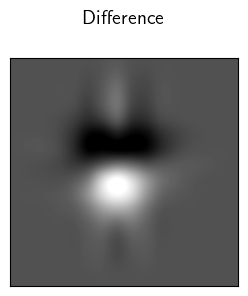

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(6, 3))
cmap = "binary"
interp = "spline16"
axes.matshow(hs[0][-1]-h0s_pq, cmap=cmap, interpolation=interp)
axes.set_xticks([])
axes.set_yticks([])
plt.suptitle(f'Difference')
plt.tight_layout()
plt.show()

## Baker states

In [ ]:
N = 48
s2 = QBM(N)

In [ ]:
bs = baker_states_pq(s2)

  0%|          | 0/48 [00:00<?, ?it/s]

100%|██████████| 48/48 [04:10<00:00,  5.22s/it]


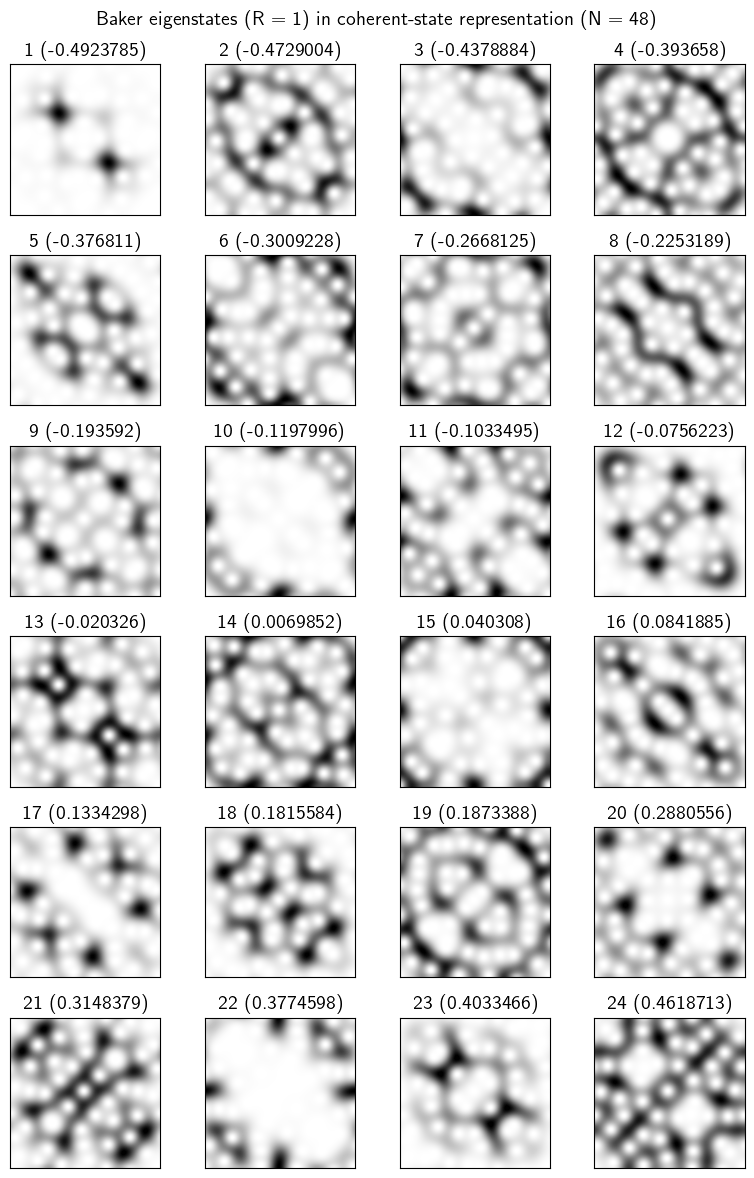

In [ ]:
plot_baker_states(bs[0], s2.baker_states['qenergy'], s2.baker_states['parities'], 1, cmap="binary")

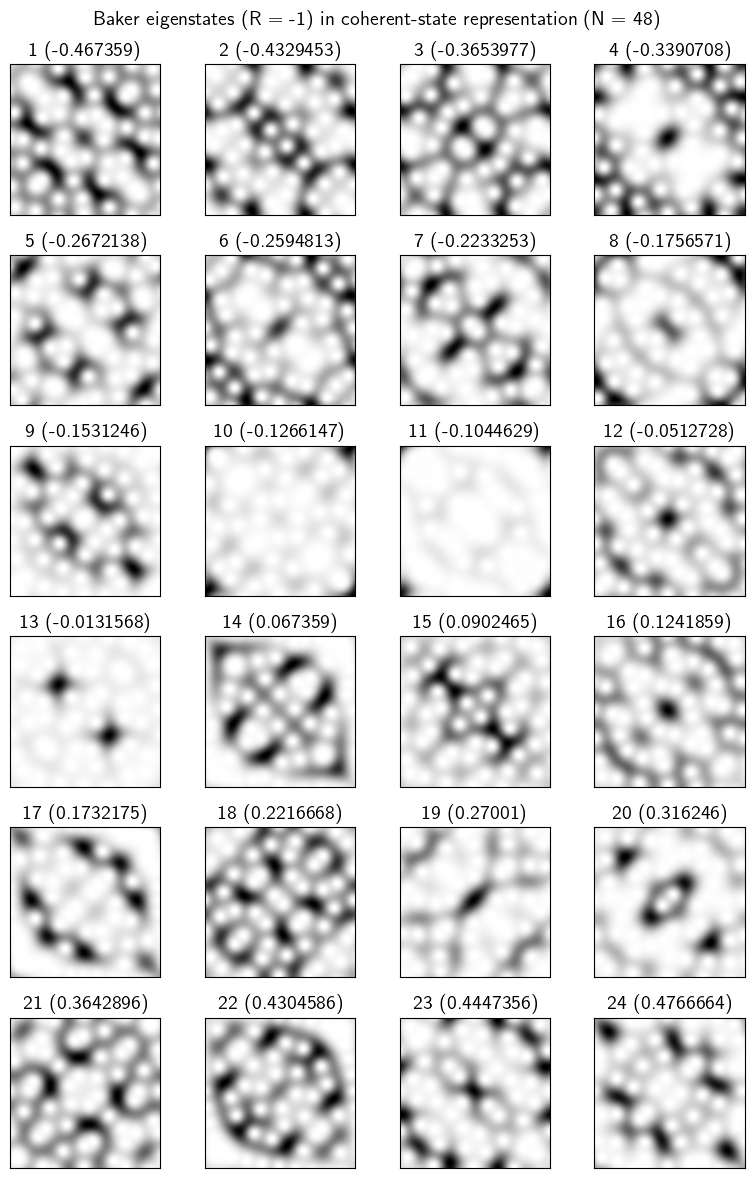

In [ ]:
plot_baker_states(bs[0], s2.baker_states['qenergy'], s2.baker_states['parities'], -1, cmap="binary")

# Autocorrelation

In [ ]:
def autocorrelations(s: QBM, n):
    acs = []
    for _ in range(1, n+1):
        acs.append(s.autocorr(_))
    return acs

In [ ]:
def autocor_plot(
    s: QBM, acs, nc: int = 4, mode: str = "heat",
    interp: str = "spline16", cmap: str = "hot"):
    N = s.N
    nT = len(acs)

    if mode not in ["heat", "contour"]:
        raise ValueError("Invalid mode for plot entered.")

    if nT % nc:
        nr = (nT // nc) + 1
    else:
        nr = nT // nc
    fig, axes = plt.subplots(nr, nc, figsize=(nc*2, nr*2))

    X = np.linspace(0, N-1, N)
    Y = np.linspace(0, N-1, N)

    T = 1

    for i in range(nr):
        for j in range(nc):
            if T > nT:
                axes[i, j].axis('off')
                continue
            axes[i, j].set_title(f"T = {T}")
            if mode == "heat":
                axes[i, j].matshow(acs[T-1], interpolation=interp, cmap=cmap)
            elif mode == "contour":
                axes[i, j].contour(X, Y, acs[T-1][:, ::-1], linewidths = 1, colors="black")
                axes[i, j].axis('square')
            T += 1
    for ax in axes.ravel():
        # ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
    plt.suptitle(f'Autocorrelations of Baker\'s Map (N = {N})')
    # plt.tight_layout()
    plt.show()

In [ ]:
acs = autocorrelations(s2, 12)

100%|██████████| 2304/2304 [00:06<00:00, 347.08it/s]


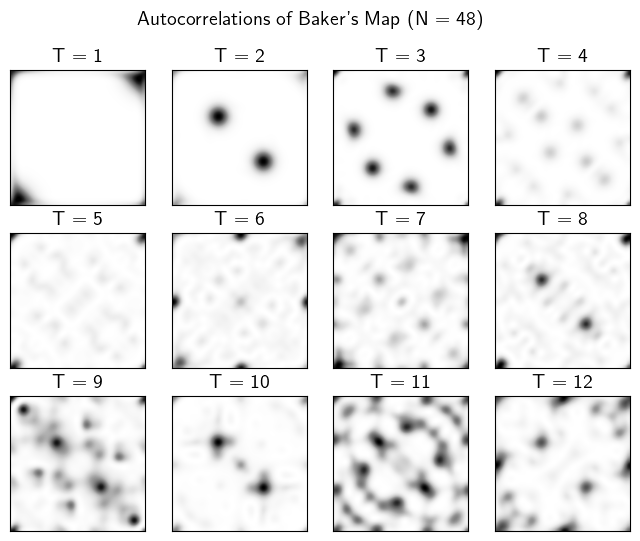

In [ ]:
autocor_plot(s2, acs, cmap="Greys")

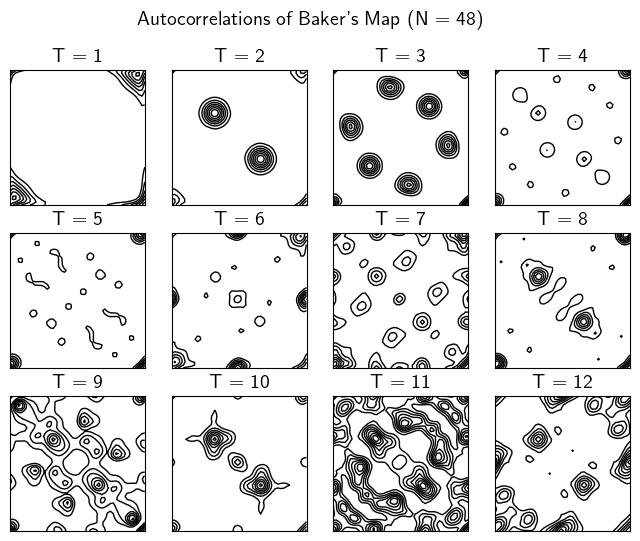

In [ ]:
autocor_plot(s2, acs, cmap="Greys", mode = "contour")